# Tidy Tuesday in Python: 
## National Park Visits
### 18 September 2019

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.  Data Import 

In [ ]:
gp = pd.read_csv('gas_price.csv')
nps = pd.read_csv('national_parks.csv')
sp = pd.read_csv('state_pop.csv')

## Set options to format number values

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## 2. Data Exploration

In [66]:
gp.tail()
sp.tail()

,year,state,pop
5911,2011,DC,"620,427.00"
5912,2012,DC,"635,040.00"
5913,2013,DC,"649,111.00"
5914,2014,DC,"658,893.00"
5915,2015,DC,"672,228.00"


In [26]:
sp.state.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'DC'], dtype=object)

In [84]:
gp.head()

,year,gas_current,gas_constant
0,1929,0.21,2.38
1,1930,0.20,2.30
2,1931,0.17,2.18
3,1932,0.18,2.61
4,1933,0.18,2.66


## Plot a line graph of gas prices over time

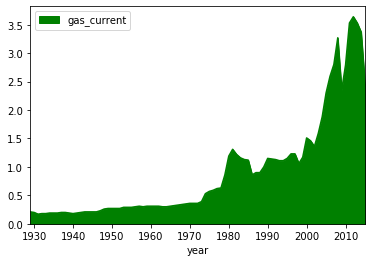

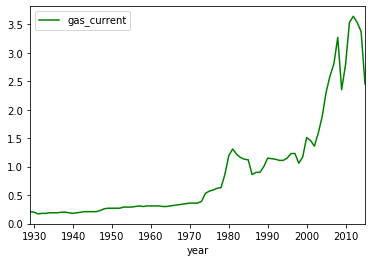

In [93]:
gp.plot.area(x = 'year', y = 'gas_current', color = 'green')
gp.plot(x = 'year', y = 'gas_current', c = 'green')

Text(0.5, 1.0, 'Gas Prices over Time')

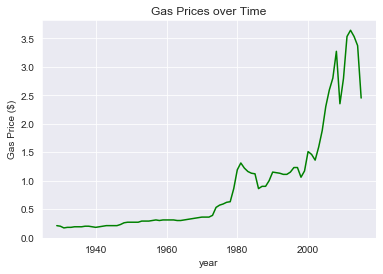

In [104]:
sns.set_style("darkgrid")
hist, ax = plt.subplots()
sns.lineplot(x = 'year', y = 'gas_current', data=gp, color='green')
plt.ylabel('Gas Price ($)')
plt.title('Gas Prices over Time')

In [65]:
nps.info()
nps.parkname.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21560 entries, 0 to 21559
Data columns (total 12 columns):
year                 21560 non-null object
gnis_id              21560 non-null object
geometry             21560 non-null object
metadata             18848 non-null object
number_of_records    21560 non-null int64
parkname             19342 non-null object
region               21560 non-null object
state                21560 non-null object
unit_code            21560 non-null object
unit_name            21560 non-null object
unit_type            21560 non-null object
visitors             21556 non-null float64
dtypes: float64(1), int64(1), object(10)
memory usage: 2.0+ MB


2218

In [29]:
nps.shape

(21560, 12)

In [27]:
nps.head()

,year,gnis_id,geometry,metadata,number_of_records,parkname,region,state,unit_code,unit_name,unit_type,visitors
0,1904,1163670,POLYGON,NaN,1,Crater Lake,PW,OR,CRLA,Crater Lake National Park,National Park,1500.0
1,1941,1531834,MULTIPOLYGON,NaN,1,Lake Roosevelt,PW,WA,LARO,Lake Roosevelt National Recreation Area,National Recreation Area,0.0
2,1961,2055170,MULTIPOLYGON,NaN,1,Lewis and Clark,PW,WA,LEWI,Lewis and Clark National Historical Park,National Historical Park,69000.0
3,1935,1530459,MULTIPOLYGON,NaN,1,Olympic,PW,WA,OLYM,Olympic National Park,National Park,2200.0
4,1982,277263,POLYGON,NaN,1,Santa Monica Mountains,PW,CA,SAMO,Santa Monica Mountains National Recreation Area,National Recreation Area,468144.0


## Questions to consider:

- which year(s) had the most/least number of visitors by unit_type?
- which park or unit_type had the most/least number of visitors?
- which state has the most/least number of parks/unit_types?
- which state has the most/least number of visitors?
- where are the unit_types/parks located geographically?
- graph the number of visitors across time for a unit_type (National Parks)
- Average annual number of visitors by park location?


## How many visit National Parks each year?

In [181]:
nps_park = nps[nps['unit_type']=='National Park'] #filter on just National Parks
nps_park.groupby('year')['visitors'].sum()  #Number of visitors to a National Park for each year

year
1904          120,690.00
1905          140,954.00
1906           30,569.00
1907           32,935.00
1908           42,768.00
              ...       
2013       64,486,815.00
2014       69,847,696.00
2015       76,258,329.00
2016       83,920,334.00
Total   3,594,027,510.00
Name: visitors, Length: 114, dtype: float64

Text(0.5, 1.0, 'Annual Visits to National Parks since 1904')

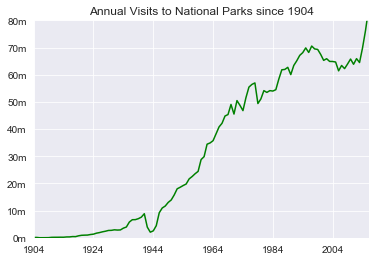

In [214]:
ax1 = nps_park.groupby('year')['visitors'].sum()[0:113].plot(c='g')
ax1.set_ylim((0,80000000))
vals = ax1.get_yticks()
ax1.set_yticklabels(['{:.0f}m'.format(x/1000000) for x in vals])
ax1.set_xlabel('') #remove the year label as it is implied by the xlim values
ax1.set_title('Annual Visits to National Parks since 1904')

In [222]:
nps_20 = nps[nps.year>'1996'] #1997-2016
#nps_20.year.value_counts()
nps_20.groupby('parkname')['visitors'].mean().sort_values(ascending=False)

parkname
National Capital Parks   236,187,845.00
Golden Gate               42,677,994.38
Lake Mead                 26,877,852.38
Natchez Trace             26,602,267.19
Gateway                   23,107,540.52
                              ...      
Aniakchak                        663.35
Honouliuli                          nan
Minidoka                            nan
Pullman                             nan
Valles Caldera                      nan
Name: visitors, Length: 336, dtype: float64

In [177]:
nps_park.loc[nps_park.year=='1904',:]

,year,gnis_id,geometry,metadata,number_of_records,parkname,region,state,unit_code,unit_name,unit_type,visitors
0,1904,1163670,POLYGON,NaN,1,Crater Lake,PW,OR,CRLA,Crater Lake National Park,National Park,"1,500.00"
110,1904,1609331,POLYGON,http://nrdata.nps.gov/programs/Lands/YELL_meta...,1,Yellowstone,IM,WY,YELL,Yellowstone National Park,National Park,"13,727.00"
206,1904,255948,MULTIPOLYGON,http://nrdata.nps.gov/programs/Lands/KICA_meta...,1,Kings Canyon,PW,CA,KICA,Kings Canyon National Park,National Park,"1,000.00"
315,1904,1528416,MULTIPOLYGON,http://nrdata.nps.gov/programs/Lands/MORA_meta...,1,Mount Rainier,PW,WA,MORA,Mount Rainier National Park,National Park,563.00
339,1904,1263056,MULTIPOLYGON,http://nrdata.nps.gov/programs/Lands/WICA_meta...,1,Wind Cave,MW,SD,WICA,Wind Cave National Park,National Park,"2,900.00"
345,1904,56796,MULTIPOLYGON,http://nrdata.nps.gov/programs/Lands/HOSP_meta...,1,Hot Springs,MW,AR,HOSP,Hot Springs National Park,National Park,"101,000.00"


In [60]:
nps.groupby('state')['unit_type'].count().sort_values(ascending=False).nlargest(5)

state
AZ    1623
CA    1543
AK    1040
VA    1035
NY     995
Name: unit_type, dtype: int64

## Which State had the most visitors?

In [156]:
nps.groupby('state')['visitors'].mean().sort_values(ascending=False).nlargest(5)

state
NV   5,036,013.95
NC   4,982,381.93
MS   3,615,193.40
DC   3,322,501.77
ME   3,145,401.98
Name: visitors, dtype: float64

In [169]:
nps[nps.state=='NV'].groupby(['year', 'parkname'])['visitors'].sum()

year   parkname   
1934   Great Basin         1,968.00
1935   Great Basin         2,977.00
1936   Great Basin         2,348.00
1937   Great Basin         2,856.00
       Lake Mead         389,294.00
                          ...      
2015   Lake Mead       7,298,465.00
2016   Great Basin       144,846.00
       Lake Mead       7,175,891.00
Total  Great Basin     3,770,774.00
       Lake Mead     411,700,377.00
Name: visitors, Length: 165, dtype: float64

In [83]:
nps.metadata.nunique()

328

In [147]:
nps.groupby('unit_type')['visitors'].sum().sort_values(ascending=False)

unit_type
National Park                           7,188,055,020.00
National Recreation Area                4,215,043,186.00
Parkway                                 2,630,136,120.00
National Historical Park                2,616,663,204.00
National Memorial                       2,266,225,484.00
National Monument                       2,175,912,958.00
National Seashore                       1,681,685,368.00
National Historic Site                    908,317,512.00
National Parkway                          776,980,718.00
National Military Park                    671,875,792.00
Park                                      668,198,946.00
National Battlefield                      300,575,338.00
Other Designation                         288,366,660.00
National Lakeshore                        279,175,498.00
National Battlefield Park                 221,596,378.00
National Scenic Riverway                  177,048,052.00
National River                            140,772,886.00
National Preserve    

In [153]:
nps.groupby(['year','unit_type'])['visitors'].mean().sort_values(ascending=False)
# why is there a total value and what does it mean?

year   unit_type                       
Total  Parkway                            657,534,030.00
       National Parkway                   194,245,179.50
       National Recreation Area           123,971,858.41
       Park                               111,366,491.00
       National Seashore                   84,084,268.40
                                               ...      
1942   Park                                         0.00
1943   National Battlefield Site                    0.00
1945   National Battlefield Site                    0.00
1946   Park                                         0.00
Total  Valles Caldera National Preserve              nan
Name: visitors, Length: 1730, dtype: float64

In [28]:
nps.unit_type.value_counts()

National Monument                        5051
National Park                            4743
National Historic Site                   3274
National Historical Park                 1984
National Memorial                        1486
National Battlefield                      859
National Recreation Area                  806
National Military Park                    613
National Preserve                         559
National Seashore                         494
Other Designation                         290
National Battlefield Park                 246
National Lakeshore                        177
Park                                      152
Parkway                                   149
National Parkway                           98
National Scenic Riverway                   93
National Historical Park and Preserve      81
National River                             79
Wild and Scenic River                      64
National Battlefield Site                  43
National Scenic River             

In [120]:
nps[nps.unit_type == 'National Park']['parkname'].nunique()

53

In [78]:
nps[nps.unit_type == 'National Park']['parkname'].dropna().unique()

array(['Crater Lake', 'Olympic', 'Black Canyon of the Gunnison',
       'Wolf Trap Farm Park', 'Arches', 'Dry Tortugas', 'Bryce Canyon',
       'Carlsbad Caverns', 'Yellowstone', "Hawai'i Volcanoes", 'Sequoia',
       'Mammoth Cave', 'Grand Teton', 'Mesa Verde', 'Great Basin',
       'Channel Islands', 'Canyonlands', 'Biscayne',
       'Guadalupe Mountains', 'Kings Canyon', 'Zion', 'Haleakala',
       'Capitol Reef', 'Joshua Tree', 'Theodore Roosevelt', 'Pinnacles',
       'Virgin Islands', 'Rocky Mountain', 'Petrified Forest',
       'Death Valley', 'Grand Canyon', 'Lassen Volcanic', 'Badlands',
       'Cuyahoga Valley', 'Mount Rainier', 'Yosemite', 'Congaree',
       'Saguaro', 'Wind Cave', 'Hot Springs', 'Denali',
       'Gates of the Arctic', 'Glacier Bay', 'Katmai', 'Kenai Fjords',
       'Kobuk Valley', 'Lake Clark', 'Wrangell-St. Elias',
       'North Cascades', 'Great Sand Dunes',
       'National Park of American Samoa', 'Glacier', 'Voyageurs'],
      dtype=object)

In [57]:
nps.groupby(['year', 'unit_type'])['visitors'].mean().tail(30).sort_values(ascending=False)

year   unit_type                            
Total  Parkway                                 657,534,030.00
       National Parkway                        194,245,179.50
       National Recreation Area                123,971,858.41
       Park                                    111,366,491.00
       National Seashore                        84,084,268.40
       National Park                            58,918,483.77
       National Scenic Riverway                 44,262,013.00
       National Military Park                   41,992,237.00
       National Memorial                        40,468,312.21
       National River                           35,193,221.50
       National Lakeshore                       34,896,937.25
       National Historical Park and Preserve    31,878,925.00
       National Historical Park                 31,150,752.43
       National Battlefield Park                27,699,547.25
       Other Designation                        24,030,555.00
       Ecological and His

## Git workflow

I started a git repository on my local machine for this project and created a .gitignore file to tell git not to track data in CSV files

- git init
- vim .gitignore and then add *.csv
- git add *
- git commit -m 'initial commit'

Then decided I wanted to push it up to Github.
First, I need to login to Github and create a remote repo.  Then, on my local machine, I added the remote repo to my local repo with the following command:

- *git remote add origin **URL path to github remote***

Next I pushed the files from my local repo up to the master branch on the remote repo which is named origin.  

- *git push origin master*